In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Deep learning packages
from keras.models import Sequential
from keras.layers import LSTM, Dense

#enable IPython to display matplolib graphs
%matplotlib inline

from sklearn import tree


2022-03-01 11:44:23.096997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 11:44:23.097013: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from ML_classes.DTModel import DTModel


In [3]:
df = pd.read_csv('./data/ouput.csv')
df['tstp'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['tstp']]
#df["tstp"] = pd.to_datetime(df["tstp"])
df["energy(kWh/hh)"] = pd.to_numeric(df["energy(kWh/hh)"], downcast="float", errors="coerce")

max_value_energy = df["energy(kWh/hh)"].max()
df['energy(kWh/hh)'] = df['energy(kWh/hh)'].apply(lambda x: x / max_value_energy)
# Sorting the values
df.sort_values('tstp', inplace=True)

In [4]:
lclid_list = df['LCLid'].unique()
def find_household(identification):
    affluenthh_filt = df["LCLid"] == identification
    affluent_hh_data = df[affluenthh_filt]
    return affluent_hh_data

hh = find_household("MAC000150")
hh.pop("LCLid")
hh = hh.set_index("tstp")
hh = hh.resample("H").sum()
hh = hh.reset_index()

In [5]:
# Initiating the class
DT = DTModel(
data = hh,
Y_var = 'energy(kWh/hh)',
lag = 6,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)

In [6]:
DT.DTModel()

2022-03-01 11:44:26.623439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 11:44:26.623891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 11:44:26.623944: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-01 11:44:26.623987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-01 11:44:26.624028: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Use /tmp/tmp63idox8j as temporary training directory
Starting reading the dataset
 1/66 [..............................] - ETA: 1:48
Dataset read in 0:00:01.824309
Training model
Model trained in 0:00:00.089109
Compiling model


[INFO kernel.cc:1153] Loading model from path
[INFO abstract_model.cc:1063] Engine "RandomForestGeneric" built
[INFO kernel.cc:1001] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
66/66 [==============================] - 3s 15ms/step - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [7]:
yhat = DT.predict()
yhat

[8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.34465e-07,
 8.344

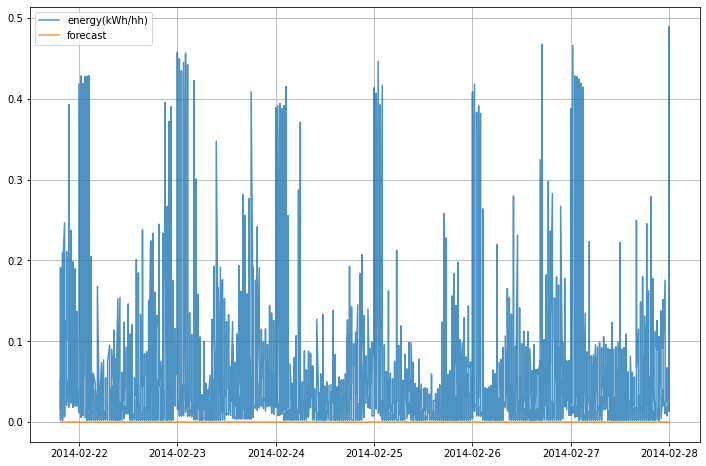

In [19]:
# Defining the lag that we used for training of the model 
lag_model = 6
# Getting the last period
ts = hh['energy(kWh/hh)'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = DT.dc.create_X_Y(ts, lag=lag_model)
X = DT.alter_x_shape(X)
# Getting the forecast
yhat = DT.model.predict(X)

yhat = DT.predict()
# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['energy(kWh/hh)', 'forecast']:
  plt.plot(
    'tstp',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()

In [8]:
DT.evaluateMAPE()

99.99861412191866

In [9]:
x_temp, y = DT.dc.create_X_Y(ts = hh[ 'energy(kWh/hh)'],lag = 1 )

In [10]:
x = []
for element in x_temp:
    temp = []
    for val in element:
        val = val[0]
        temp.append(val)
    #temp = temp[0]
    x.append(temp)

In [11]:
x_temp.reshape(-1,1)

array([[0.09314473],
       [0.16648532],
       [0.04744287],
       ...,
       [0.22285093],
       [0.17606094],
       [0.04047878]])

In [12]:
clf = tree.DecisionTreeRegressor()

In [13]:
clf = clf.fit(x, y)

[Text(0.490625, 0.9285714285714286, 'X[0] <= 0.142\nsquared_error = 0.008\nsamples = 19862\nvalue = 0.089'),
 Text(0.24791666666666667, 0.7857142857142857, 'X[0] <= 0.078\nsquared_error = 0.004\nsamples = 17067\nvalue = 0.069'),
 Text(0.13333333333333333, 0.6428571428571429, 'X[0] <= 0.049\nsquared_error = 0.002\nsamples = 13387\nvalue = 0.058'),
 Text(0.06666666666666667, 0.5, 'X[0] <= 0.041\nsquared_error = 0.002\nsamples = 8626\nvalue = 0.049'),
 Text(0.03333333333333333, 0.35714285714285715, 'X[0] <= 0.038\nsquared_error = 0.002\nsamples = 6859\nvalue = 0.048'),
 Text(0.016666666666666666, 0.21428571428571427, 'X[0] <= 0.037\nsquared_error = 0.002\nsamples = 5273\nvalue = 0.047'),
 Text(0.008333333333333333, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.025, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.05, 0.21428571428571427, 'X[0] <= 0.041\nsquared_error = 0.001\nsamples = 1586\nvalue = 0.049'),
 Text(0.041666666666666664, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0583333

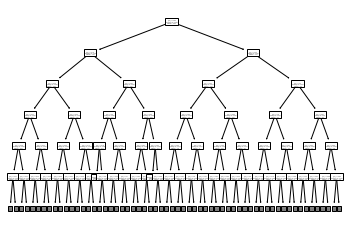

In [14]:
tree.plot_tree(clf, max_depth = 5)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

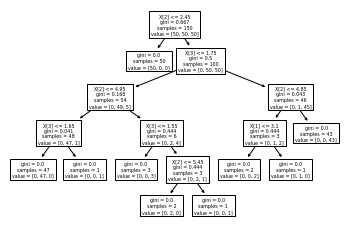

In [15]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf)